In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# JupyterNotebook上でグラフを表示する
%matplotlib inline
# DataFrameですべての列を表示する
pd.options.display.max_columns = None

In [2]:
dataset_base = pd.read_csv("baseball_salary.csv")
dataset_base.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [3]:
#分析に必要な項目を抜き出してリネーム
dataset = dataset_base[["推定年俸", "打点", "年数", "打率", "本塁打", "球団勝率"]]

#列名をリネームする
dataset = dataset.rename(columns={"推定年俸":"salary", "打点":"points", "年数":"years_exp",\
                                 "打率":"batting", "本塁打":"homerun", "球団勝率":"team_win"})

dataset.head()

,salary,points,years_exp,batting,homerun,team_win
0,21000,92,11,0.308,23,0.633
1,19000,56,7,0.271,14,0.633
2,14000,60,5,0.290,8,0.633
3,11500,78,7,0.265,27,0.633
4,11000,48,20,0.292,9,0.633


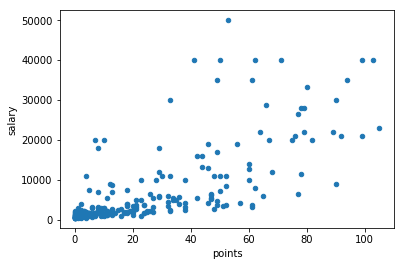

In [4]:
dataset.plot(kind="scatter", x="points", y="salary")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
# 目的変数(Y)：推定年俸、説明変数(X)：打点
Y = np.array(dataset["salary"])
X = np.array(dataset[["points"]])

In [7]:
print("Y=", Y.shape, ", X=", X.shape)

Y= (241,) , X= (241, 1)


In [8]:
# XとYを機械学習用データ(train)とテストデータ(test)に7:3に分ける
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# Trainをさらに学習データ(train)と検証データ(valid)に7:3に分ける
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [9]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_train=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test", X_test.shape)

Y_train= (117,) , X_train= (117, 1)
Y_valid= (51,) , X_train= (51, 1)
Y_test= (73,) , X_test (73, 1)


In [10]:
# 線形回帰モデル
linear_model = LinearRegression()
# 学習はfit
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
Y_pred = linear_model.predict(X_valid)

In [13]:
print(Y_valid[:5])
print(Y_pred[:5])

[1140 5400 5700 1650 3100]
[ 470.34255761 8918.81501551 9415.78398362 2955.18739817 5688.51672278]


In [14]:
# 平均二乗誤差を算出
linear_model_mse = mean_squared_error(Y_valid, Y_pred)
print("MSE(1変数の線形回帰モデル):", linear_model_mse)

MSE(1変数の線形回帰モデル): 66838239.72825806


In [15]:
# interceptは切片という意味
p0 = linear_model.intercept_
# coefは係数という意味
p1 = linear_model.coef_[0]

print("p0:", p0, ", p1:", p1)

p0: 470.3425576073523 , p1: 248.484484056025


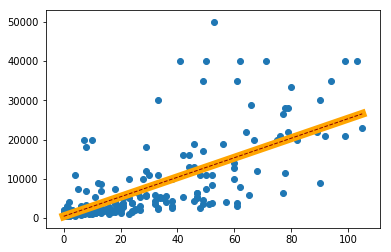

In [16]:
def calc(x):
    return p0 + p1 * x

# 打点(X)の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)
# パラメータを使った１次関数による値
Y_simu = calc(X_simu)
# 線形モデルによる予測値
Y_prd2 = linear_model.predict(X_simu.reshape(-1,1))

# １次関数：赤い点線、予測値：オレンジ、実際の値：青い散布図
plt.plot(X_simu, Y_prd2, color="orange", linewidth=8)
plt.plot(X_simu, Y_simu, color="darkred", linewidth=1, linestyle="dashed")
plt.scatter(X, Y)
plt.show()

In [17]:
# 推定年俸の対数
Y_log = np.log10(Y)

# 推定年俸と対数の比較
print(Y[:5])
print(Y_log[:5])

[21000 19000 14000 11500 11000]
[4.32221929 4.2787536  4.14612804 4.06069784 4.04139269]


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成、予測
log_model = LinearRegression()
log_model.fit(X_train, Y_train)
Y_pred = log_model.predict(X_valid)

In [19]:
# 対数から金額に戻す
Y_valid_org = np.power(10, Y_valid)
Y_pred_org = np.power(10, Y_pred)

# MSEを算出
log_model_mse = mean_squared_error(Y_valid_org, Y_pred_org)
print("MSE(1変数の線形回帰モデル～対数版)：", log_model_mse)

MSE(1変数の線形回帰モデル～対数版)： 76734989.36897755


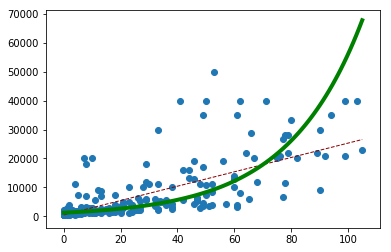

In [20]:
# 打点(X)の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)

# 線形回帰モデルによる予測値
Y_prd1 = linear_model.predict(X_simu.reshape(-1, 1))
# 線形回帰モデル（対数版）による予測値
Y_prd2 = log_model.predict(X_simu.reshape(-1, 1))
Y_prd2 = np.power(10, Y_prd2)

# 1次関数：赤い点線、予測値：オレンジ、実際の値：青い散布図
plt.plot(X_simu, Y_prd1, color="darkred", linewidth=1, linestyle="dashed")
plt.plot(X_simu, Y_prd2, color="green", linewidth=4, linestyle="solid")
plt.scatter(X, Y)
plt.show()

In [21]:
# 以下の操作用に１次元配列に変換する
X2 = X.reshape(-1)

# pointsの2～5乗を新たな説明変数として追加
# axis:結合する次元を指定。1は列
X2 = np.stack([X2, X2**2, X2**3, X2**4, X2**5], axis=1)

# 形状を確認
print("Y=", Y.shape, ", X2=", X2.shape)

Y= (241,) , X2= (241, 5)


In [22]:
# データセットの分割。X2を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
linear_model2 = LinearRegression()
linear_model2.fit(X_train, Y_train)
Y_pred = linear_model2.predict(X_valid)

# MSEを算出
linear_model2_mse = mean_squared_error(Y_valid, Y_pred)
print("MSE(多項式モデル)：", linear_model2_mse)

MSE(多項式モデル)： 66191889.04353648


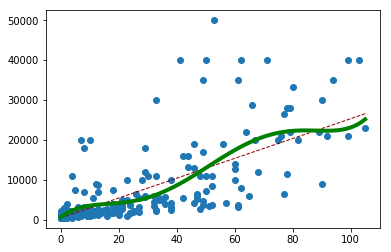

In [23]:
# 打点（X）の最小値～最大値の範囲で値を１００個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)
X_simu2 = np.stack([X_simu, X_simu**2, X_simu**3, X_simu**4, X_simu**5], axis=1)

# 線形回帰モデルによる予測値
Y_prd1 = linear_model.predict(X_simu.reshape(-1, 1))
# 線形回帰モデル(対数版)による予測値
Y_prd2 = linear_model2.predict(X_simu2)

# 1次関数：赤い点線、予測値：オレンジ、実際の値：青い散布図
plt.scatter(X, Y)
plt.plot(X_simu, Y_prd1, color="darkred", linewidth=1, linestyle="dashed")
plt.plot(X_simu, Y_prd2, color="green", linewidth=4, linestyle="solid")
plt.show()

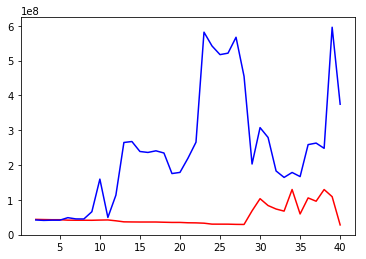

In [24]:
# MSEの結果を入れるリスト
mse_list_train = []
mse_list_valid = []

# 次元の範囲
digree = range(2, 41)

for i in digree:
    # i次元の多項式モデルを作成
    X3 = X.reshape(-1)
    X3 = np.stack([X3**j for j in range(1, i)], axis=1)
    
    # データセットの分割。X3を使ってることに注意
    X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.3, random_state=0)
    X_train, X_valid, Y_train, Y_valid = train_test_split(X3, Y, test_size=0.3, random_state=0)
    
    # モデルの作成～予測
    linear_model3 = LinearRegression()
    linear_model3.fit(X_train, Y_train)

    # 学習データに対する予測とMSEの算出
    Y_pred = linear_model3.predict(X_train)
    mse = mean_squared_error(Y_train, Y_pred)
    mse_list_train.append(mse)    
    
    # 検証データに対する予測とMSEの算出
    Y_pred = linear_model3.predict(X_valid)
    mse = mean_squared_error(Y_valid, Y_pred)
    mse_list_valid.append(mse)
# グラフの描写
plt.plot(digree, mse_list_train, color="red")
plt.plot(digree, mse_list_valid, color="blue")

In [25]:
# 目的変数(Y)：推定年俸：salary
# 説明変数(X)：打点：points, 年数：years_exp, 打率：batting, 本塁打：homerun, 球団勝率：team_win
X4 = np.array(dataset[['points', 'years_exp', 'batting', 'homerun', 'team_win']])

# 形状を確認
print("Y=", Y.shape, ", X4=", X4.shape)

Y= (241,) , X4= (241, 5)


In [26]:
# データセットの分割。X4を使っていることに注意する。
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X4, Y, test_size=0.3, random_state=0)

# モデルの作成～予測
general_model = LinearRegression()
general_model.fit(X_train, Y_train)
Y_pred = general_model.predict(X_valid)

# MSEを算出
general_model_mse = mean_squared_error(Y_valid, Y_pred)
print("MSE(多重線形回帰モデル)：", general_model_mse)

MSE(多重線形回帰モデル)： 38730649.70299631


In [27]:
from sklearn.linear_model import Lasso

# データセットの分割。X4を使っていることに注意。
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X4, Y, test_size=0.3, random_state=0)

# モデルの作成～予測
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
Y_pred = lasso_model.predict(X_valid)

# MSEを算出
lasso_model_mse = mean_squared_error(Y_valid, Y_pred)
print("MSE(Lasso回帰)：", lasso_model_mse)

MSE(Lasso回帰)： 38690543.25962217


In [28]:
from sklearn.linear_model import Ridge

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X4, Y, test_size=0.3, random_state=0)

# モデルの作成～予測
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
Y_pred = ridge_model.predict(X_valid)

# MSEを算出
ridge_model_mse = mean_squared_error(Y_valid, Y_pred)
print("MSE(Ridge回帰)：", ridge_model_mse)

MSE(Ridge回帰)： 37913070.846773855


In [29]:
from sklearn.tree import DecisionTreeRegressor

# データの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X4, Y, test_size=0.3, random_state=0)

# モデルの作成～予測
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_valid)

# MSEを算出
tree_model_mse = mean_squared_error(Y_valid, Y_pred)
print("MSE(回帰木)：", tree_model_mse)

MSE(回帰木)： 89976738.35616438


In [30]:
from sklearn.ensemble import RandomForestRegressor

# データの分割。X4を使用していることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)

# モデルの作成
randomforest_model = RandomForestRegressor(n_estimators=10, random_state=0)
randomforest_model.fit(X_train, Y_train)
Y_pred = randomforest_model.predict(X_valid)

# MSEの計算
randomforest_model_mse = mean_squared_error(Y_valid, Y_pred)
print("MSE(ランダムフォレスト)：", randomforest_model_mse)

MSE(ランダムフォレスト)： 45016659.49315068


In [35]:
import itertools

def get_best_features(x, y, feature_names, model):
    # すべての説明変数の組み合わせを入れるリスト
    _name_list = []
    
    # 指定された長さの組み合わせを作成する
    for i in range(1, len(feature_names)+1):
        for submit in itertools.permutations(feature_names, i):
            _name_list.append(list(submit))
            
    # 最良のMSEを入れる変数（大きい値を入れておく）
    _best_mse = 999999999999
    _best_mse_name = ""
    
    # 総当たりで比較する
    for _name in _name_list:
        _x = np.array(x[_name])
        
        # データセットの分割。X4を使っていることに注意
        _x_train, _x_test, _y_train, _y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
        _x_train, _x_valid, _y_train, _y_valid = train_test_split(X4, Y, test_size=0.3, random_state=0)
        
        # モデルの作成～予測
        model.fit(_x_train, _y_train)
        _y_pred = model.predict(_x_valid)
        
        # MSEを算出
        _mse = mean_squared_error(_y_valid, _y_pred)
        
        # 最小のmseを補完
        if _mse < _best_mse:
            _best_mse = _mse
            _best_mse_name = _name
    
    print(model.__class__.__name__, ":", ",".join(_best_mse_name), ": MSE=", _best_mse)

In [36]:
# 説明変数名のリスト
feature_names = ["points", "years_exp", "batting", "homerun", "team_win"]

# モデルのリストを用意
model_list = []
model_list.append(LinearRegression())
model_list.append(Lasso())
model_list.append(Ridge())
model_list.append(DecisionTreeRegressor())
model_list.append(RandomForestRegressor(n_estimators=100, random_state=0))

for model in model_list:
    get_best_features(dataset, Y, feature_names, model)

LinearRegression : points : MSE= 38730649.70299631
Lasso : points : MSE= 38690543.25962217
Ridge : points : MSE= 37913070.846773855
DecisionTreeRegressor : points,years_exp,batting,homerun : MSE= 62340398.63013699
RandomForestRegressor : points : MSE= 49516717.48054795


In [37]:
from sklearn.model_selection import GridSearchCV

# モデル：ランダムフォレスト
model = RandomForestRegressor(random_state=0)

# パラメータ:n_estimators:木の数、max_depth:木の深さ
params = {"n_estimators":[10, 50, 100], "max_depth":[5, 10, 50]}

# グリッドサーチ
# cv:交差検証の回数, scoring:目的変数
gscv = GridSearchCV(model, param_grid=params, cv=3, scoring="neg_mean_squared_error")

In [39]:
# ランダムフォレストで性能が良かった説明変数の組み合わせを指定
X5 = np.array(dataset[["years_exp", "homerun", "team_win", "batting"]])

# データセットの分割。X5を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.3, random_state=0)

In [40]:
gscv.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
gscv.best_score_

-53664795.33467119

In [42]:
gscv.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [43]:
# 最適なパラメータによる学習
randomforest_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=0)
randomforest_model.fit(X_train, Y_train)

# テストデータによる評価
Y_pred = randomforest_model.predict(X_test)

randomforest_model_mse = mean_squared_error(Y_test, Y_pred)
print("MSE(ランダムフォレスト)：", randomforest_model_mse)

MSE(ランダムフォレスト)： 53310373.3638637
